In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linspace
from numpy.linalg import norm

In [3]:
alpha = 3
beta = 2e-3
sigma= 6e-4
gamma = 0.5

exact_x = np.array((833.33333333, 1500.))
X_k = []
X_k_plus_1 = []

In [4]:
'''
Функция, которая производит LU-разложение матрицы А и возвращает матрицы
L, U и P. Если permute = True, то разложение реализуется с частичным выбором
ведущего элемента (т.е. LUP-разложение).
'''
def lu(A, permute):
    n = len(A)
    U = np.copy(A)
    L = np.eye(n)
    P = np.eye(n)  
    for k in range(n - 1):
        P_0 = np.eye(n)
        U_0 = np.eye(n)
        L_0 = np.eye(n)
        if (permute):
            max_elem = U[k][k].copy()
            i_max = k
            for i in range (k + 1, n):
                if abs(max_elem) < abs(U[i][k]):
                    max_elem = U[i][k].copy()
                    i_max = i
            P_0[i_max], P_0[k] = P_0[k].copy(), P_0[i_max].copy()
            U = P_0.dot(U)
        for i in range(k + 1, n):
            c = U[i][k] / U[k][k]
            U_0[i][k] = -c
            L_0[i][k] = c
        U = U_0.dot(U)
        P = P_0.dot(P)
        L = L.dot(P_0.dot(L_0))
    L = P.dot(L)    
    return L, U, P
 
'''
Функция, которая возвращает решение СЛАУ Ах = b, где матрица
A представлена в виде LU-разложения с матрицей перестановок P,
т.е. PA = LU.
'''
def solve(L, U, P, b):
    n = len(L)
    x = [0] * n
    y = [0] * n
    for i in range(n):
        s = sum(L[i][j] * y[j] for j in range(i))
        y[i] = b[np.where(P[i] == 1)[0][0]] - s
    for i in reversed(range(n)):
        s = sum(U[i][j] * x[j] for j in range(i + 1, n))
        x[i] = (y[i] - s) / U[i][i]
    return x
 
'''
Модель Лотки-Вольтерры
'''
def f(x):
    f_x = [alpha * x[0] - beta * x[0] * x[1],
           sigma* x[0] * x[1] - gamma * x[1]]
    return np.array(f_x)
 
'''
Матрица Якоби
'''
def Jacobian_matrix(x):
    J = [[alpha - beta * x[1], - beta * x[0]],
         [sigma* x[1], sigma* x[0] - gamma]]
    return np.array(J)
 
'''
Метод Ньютона
'''
def newton(x_0, f, J):
    i = 0
    j = 0
    while 1:
        L, U, P = lu(J(x_0), True)
        delta_x = solve(L, U, P, f(x_0))
        x = np.subtract(x_0, delta_x)
        if norm(np.subtract(x, x_0), np.inf) <= 10e-8:
            break
        X_k_plus_1.append(norm(x - exact_x, np.inf))
        X_k.append(norm((x_0 - exact_x), np.inf))
        i += 1
        x_0 = x
    return x, i

def f_x2(x, lamb):
    return 2 * x**2 * lamb

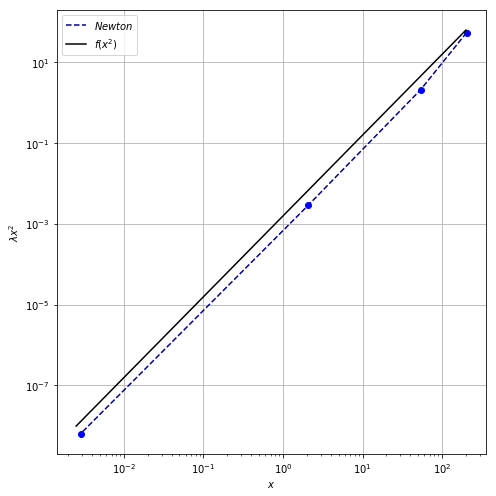

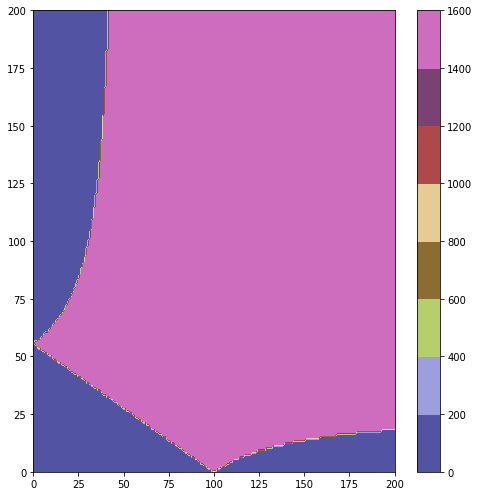

In [5]:
'''
Вывод сходимости метода
'''
x_0_s = np.array((630, 1695))
x, n = newton(x_0_s, f, Jacobian_matrix)
X = np.logspace(-2.6, 2.3, n)
lamb = X_k_plus_1[n - 1] / (X_k[n - 1])**2
f_x = [f_x2(X[i], lamb) for i in range(n)]
 
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (7, 7))
axes.loglog(X_k, X_k_plus_1, '--', color="darkblue", label="$Newton$", basex=10, basey=10)
axes.loglog(X_k, X_k_plus_1, 'o', color="blue", basex=10, basey=10)
axes.loglog(X, f_x, '-', color="black", label="${f(x^{2})}$", basex=10, basey=10)
axes.set_xlabel('$x$')
axes.set_ylabel('${\lambda}x^{2}$')
axes.legend(loc='upper left');
axes.grid()
fig.tight_layout()
plt.show()
#fig.savefig("newnot_conv.png", dpi = 380)

'''
Вывод матрицы супремум-норм
'''
size = 201
x_0 = np.array((15, 15))
M_sup = np.eye(size)
for i in range(size):
    for j in range(size):
        x_0[0] = 15 * i
        x_0[1] = 15 * j
        if(x_0[0] == 0 and x_0[1] == 1500):
            M_sup[i][j] = None
        else:
            x = newton(x_0, f, Jacobian_matrix)
            M_sup[i][j] = norm(x[0], np.inf)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))
fig.tight_layout()
fig.colorbar(axes.contourf(linspace(0, size - 1, size), linspace(0, size - 1, size), M_sup, cmap=plt.cm.tab20b))
fig.show()
#fig.savefig("newton.png", dpi=280)